# 분류 (Classification)
- 입력 데이터를 미리 정의된 여러 클래스 중 하나로 예측하는 것 (범주형 데이터)
    - 이진 분류 : 양성(1), 음성(0) 중에 하나를 맞추는 것
    - 다중 분류 : 여러 클래스 중 하나를 맞추는 것

### LOgistic Regression
- 선형 회귀 방식으로 분류 문제를 해결하는 모델
    - 이진 분류 : 이진 분류를 위한 로지스틱 함수(시그모이드)를 통해 확률값을 계산하고 0 또는 1로 분류
    - 다중 분류 : 다중 분류를 위한 소프트맥스 함수를 통해 각 클래스별 확률값을 계산해 다중 분류

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##### 이진 분류를 위한 SIgmoid 함수
- 선형회귀식을 통해 도출한 예측값(x)을 0과 1 사이의 수로 변환해주는 활성화 함수(Activation Function)

    $
        시그모이드(z) = \frac{1}{1 + e^{-z}}
    $

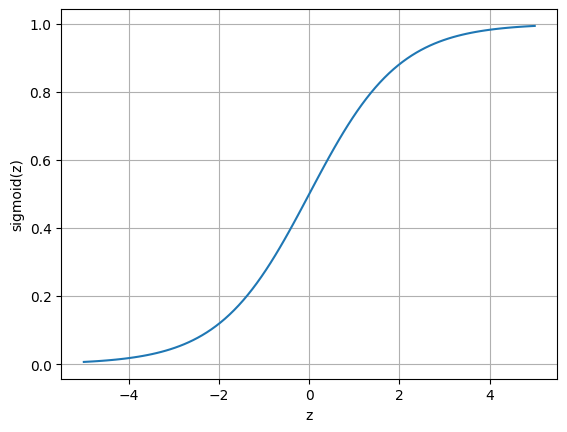

In [5]:
# 시그모이드 시각화
z = np.linspace(-5, 5, 100) # 선형회귀 결과값
sigmoid_value = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid_value)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.grid()
plt.show()

In [14]:
# 도미, 빙어 데이터셋 준비비
fish_df = pd.read_csv('./data/fish.csv')
# fish_df['Species'].value_counts()
is_bream_or_smelt = (fish_df['Species'] == "Bream") | (fish_df['Species'] == 'Smelt') 
fish_df = fish_df[is_bream_or_smelt]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = fish_df.drop('Species', axis=1)
y = fish_df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [17]:
# 모델 학습 및 평가
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)

lr_clf.score(X_train_scaled, y_train), lr_clf.score(X_test_scaled, y_test)

(1.0, 1.0)

In [19]:
y_pred = lr_clf.predict(X_test_scaled[:3]) 
y_pred # ['Bream', 'Smelt', 'Smelt']

print(lr_clf.classes_) # 분류 카테고리리
lr_clf.predict_proba(X_test_scaled[:3]) # 클래스별 확률
# w1x1 + w2x2 + ... + b

['Bream' 'Smelt']


array([[0.98159822, 0.01840178],
       [0.04990096, 0.95009904],
       [0.09298277, 0.90701723]])

In [20]:
lr_clf.coef_, lr_clf.intercept_

(array([[-0.57717269, -0.79233938, -0.82533982, -0.86579233, -0.82205625]]),
 array([-2.38186126]))

In [23]:
# 선형회귀값 직접 계산
z1 = np.dot(X_test_scaled[:3], lr_clf.coef_[0]) + lr_clf.intercept_

# 선형회귀값 계산 함수 decision_function
z2 = lr_clf.decision_function(X_test_scaled[:3])
z1, z2

(array([-3.97673464,  2.94652601,  2.27774726]),
 array([-3.97673464,  2.94652601,  2.27774726]))

In [24]:
# 시그모이드 함수 적용
sigmoid_value = 1 / (1 + np.exp(-z1))
sigmoid_value

array([0.01840178, 0.95009904, 0.90701723])

In [26]:
# 최종 결과
['Smelt' if  value >= 0.5 else 'Bream' for value in sigmoid_value]

['Bream', 'Smelt', 'Smelt']

##### 다중 분류를 위한 Softmax 함수
- 다중 클래스 분류를 위한 활성화 함수로 각 클래스에 대한 확률값 계산
- K 개의 클래스가 존재할 때 주어진 입력에 대해 다음과 같이 계산

    $
        softmax(z_i) = \frac{e^{z_k}}{\sum_{j=1}^{k} e^{z_j}}
    $

    - $z_k$ : 각 클래스에 대한 점수 (입력값)
    - $e^{z_k}$ : 해당 점수에 대한 지수 함수 적용
    - $\sum_{j=1}^{k} e^{z_j}$ : 모든 클래스 점수에 대해 지수 함수 적용 후 총합

**다중 클래스 확률 계산 순서**
1. 샘플에 대한 회귀 결과 z 계산
2. 소프트맥스 함수 적용
    - z를 e의 지수로 적용해 값을 확대 (클래스별 z의 차이를 극대화)
    - 합을 각 클래스의 값으로 나눠 비율을 계산하고 반환
3. 가장 높은 확률 값을 가진 클래스 선택

In [28]:
# 데이터셋 생성
from sklearn.datasets import make_classification

X ,y = make_classification(    # 분류 문제 연습을 위한 가상 데이터셋 생성 함수
    n_samples=100,      # 샘플 갯수
    n_features=4,       # 전체 특성 개수
    n_informative=3,    # 유의미한 특성 개수
    n_redundant=0,      # 중복 특성 개수
    n_classes=3,        # 클래스 수
    random_state=42     # 랜덤 시드
)

df = pd.DataFrame(X, columns=['feat1','feat2','feat3','feat4'])
df['target'] = y
df

,feat1,feat2,feat3,feat4,target
0,1.437839,-1.151891,-0.808298,0.947384,1
1,-1.243953,-2.665636,-0.525755,-2.794481,2
2,-2.403298,2.788787,1.368632,0.520942,1
3,-0.572492,-0.395373,-0.576904,-1.502189,2
4,-0.785067,-2.013302,0.366598,0.779589,2
...,...,...,...,...,...
95,1.650580,-1.108798,-0.718444,-0.227124,0
96,-0.499463,0.453598,1.179440,-2.068572,2
97,0.456127,-0.262591,-0.827231,-3.515597,0
98,2.418974,-1.309900,0.012592,-0.052393,1


In [29]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
# 모델 학습 및 평가
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_train, y_train), lr_clf.score(X_test, y_test)

(0.7066666666666667, 0.44)

In [31]:
y_pred = lr_clf.predict(X_test[:5])
y_pred

array([1, 0, 0, 1, 2])

In [33]:
# predict_proba = 클래스별 분류에 대한 확률 = softmax 함수 적용 결과
# 모든 확률의 합은 1
y_pred_proba = lr_clf.predict_proba(X_test[:5])
y_pred_proba, y_pred_proba.sum(axis=1)

(array([[0.22917118, 0.39960169, 0.37122713],
        [0.83550691, 0.16166581, 0.00282727],
        [0.573597  , 0.32484717, 0.10155583],
        [0.20188375, 0.64427073, 0.15384551],
        [0.02755811, 0.07287149, 0.8995704 ]]),
 array([1., 1., 1., 1., 1.]))

In [35]:
# 직접 계산
w = lr_clf.coef_
b = lr_clf.intercept_
w.shape, b.shape # ((3, 4) = (클래스 수, 특성 수), (3,) = 클래스 수)

((3, 4), (3,))

In [36]:
# 결정함수 (선형회귀값 계산)
Z = lr_clf.decision_function(X_test[:5])
Z

array([[-0.34611464,  0.20988442,  0.13623022],
       [ 2.44374453,  0.80123723, -3.24498176],
       [ 0.76663021,  0.19805797, -0.96468818],
       [-0.29622795,  0.86419902, -0.56797107],
       [-1.48600708, -0.51360637,  1.99961345]])

In [44]:
# softmax 함수
def softmax(z):
    exp_z = np.exp(z)
    sum_exp_z = np.sum(exp_z, axis=1, keepdims=True)
    # print(exp_z, sum_exp_z)
    return exp_z / sum_exp_z

y_pred_proba = softmax(Z)
y_pred_proba

array([[0.22917118, 0.39960169, 0.37122713],
       [0.83550691, 0.16166581, 0.00282727],
       [0.573597  , 0.32484717, 0.10155583],
       [0.20188375, 0.64427073, 0.15384551],
       [0.02755811, 0.07287149, 0.8995704 ]])

In [43]:
# sum 함수 주의사항
n = np.array([[1,2,3],[4,5,6]])
exp_n = np.exp(n)
# keepdims=False -> (2, ) : 차원 축소
# Keepdims=True -> (2, 1) : 차원 유지
sum_exp_n = np.sum(exp_n, axis=1, keepdims=False)
print(exp_n)
print(sum_exp_n)

[[  2.71828183   7.3890561   20.08553692]
 [ 54.59815003 148.4131591  403.42879349]]
[ 30.19287485 606.44010263]


In [45]:
# scipy의 softmax 함수
import scipy
y_pred_proba = scipy.special.softmax(Z, axis=1)
y_pred_proba

array([[0.22917118, 0.39960169, 0.37122713],
       [0.83550691, 0.16166581, 0.00282727],
       [0.573597  , 0.32484717, 0.10155583],
       [0.20188375, 0.64427073, 0.15384551],
       [0.02755811, 0.07287149, 0.8995704 ]])

In [46]:
pred = np.argmax(y_pred_proba, axis=1)
pred

array([1, 0, 0, 1, 2])

- 다중 생선 분류

In [53]:
# 데이터 로드 ./data/fish.csv
fish_df = pd.read_csv('./data/fish.csv')
fish_df
X = fish_df.drop('Species', axis=1)
y = fish_df['Species']

In [54]:
# 데이터 분리 및 정규화
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [55]:
# 모델 훈련 및 평가
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_train, y_train), lr_clf.score(X_test, y_test)

c:\Users\Playdata\AppData\Local\anaconda3\envs\sky_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9831932773109243, 0.95)

In [57]:
lr_clf.predict(X_test)

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch', 'Bream', 'Smelt',
       'Roach', 'Perch', 'Pike', 'Bream', 'Whitefish', 'Bream', 'Parkki',
       'Bream', 'Bream', 'Perch', 'Perch', 'Perch', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Perch', 'Perch', 'Roach',
       'Smelt', 'Smelt', 'Pike', 'Perch', 'Perch', 'Pike', 'Bream',
       'Perch', 'Roach', 'Roach', 'Parkki', 'Perch'], dtype=object)

In [58]:
fish_df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

---

강사님 풀이

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = fish_df.drop('Species', axis=1)
y = fish_df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [68]:
# from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)

lr_clf.score(X_train_scaled, y_train), lr_clf(X_test_scaled, y_test)

TypeError: 'LogisticRegression' object is not callable

In [69]:
lr_clf.predict(X_test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [70]:
# 모델에 저장된 클래스 - 알파벳순
# 차례대로 0, 1, 2, 3, 4, 5, 6
lr_clf.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)